<h1><p style="text-align: center;"> Final Term (Assignment-1)</p></h1>
<h3><p style="text-align: center;">NAME: REZUAN ISLAM </p></h3>
<h3><p style="text-align: center;">ID: 20-43691-2 </p></h3>
 


#### Build a basic CNN model using tensorflow sequential API to classify CIFAR-10 dataset.

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

#### Here, three Different Optimizers (SGD, ADAM, RMSPROP). 
For each optimizer, a new model created and compare their performances using plotting.
We can see that in all the optimizer, the loss is dicrease and the accuracy is increase gradually.
In the first epoch the accuracy is 0.3045 and in the last epoch the accuracy is 0.8540. So this model may fullfil our objective.

Epoch 1/10
1563/1563 [==============================] - 50s 31ms/step - loss: 1.8697 - accuracy: 0.3045 - val_loss: 1.4755 - val_accuracy: 0.4865
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2375 - accuracy: 0.5599 - val_loss: 1.1125 - val_accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0063 - accuracy: 0.6474 - val_loss: 0.9850 - val_accuracy: 0.6542
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8520 - accuracy: 0.7019 - val_loss: 0.9333 - val_accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7252 - accuracy: 0.7447 - val_loss: 0.9410 - val_accuracy: 0.6849
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6327 - accuracy: 0.7768 - val_loss: 0.9494 - val_accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5354 - accuracy: 0.8073 - val_loss: 1.0613 -

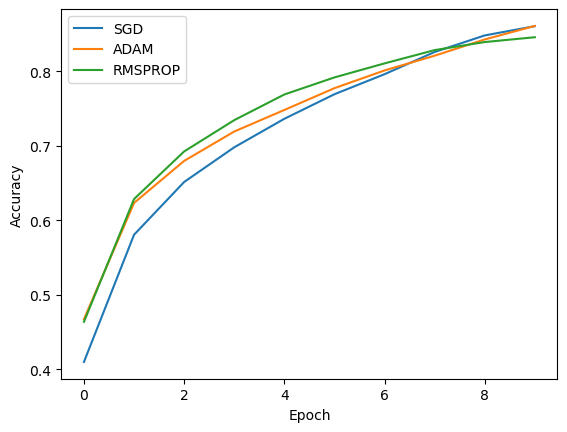

In [3]:
def train_model(optimizer_name, optimizer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
    return history

sgd_history = train_model("SGD", tf.keras.optimizers.SGD(lr=0.01, momentum=0.9))
adam_history = train_model("ADAM", tf.keras.optimizers.Adam(lr=0.001))
rmsprop_history = train_model("RMSPROP", tf.keras.optimizers.RMSprop(lr=0.001))


import matplotlib.pyplot as plt

plt.plot(sgd_history.history['accuracy'], label='SGD')
plt.plot(adam_history.history['accuracy'], label='ADAM')
plt.plot(rmsprop_history.history['accuracy'], label='RMSPROP')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


#### Demonstration the effect of using regularizes (L1/L2) in Conv2D layer.

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.7051 - accuracy: 0.3769 - val_loss: 1.1813 - val_accuracy: 0.5734
Epoch 2/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.1323 - accuracy: 0.6027 - val_loss: 1.0536 - val_accuracy: 0.6254
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.9292 - accuracy: 0.6727 - val_loss: 0.9164 - val_accuracy: 0.6802
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8040 - accuracy: 0.7187 - val_loss: 0.8719 - val_accuracy: 0.6966
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7050 - accuracy: 0.7519 - val_loss: 0.8490 - val_accuracy: 0.7103
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.6329 - accuracy: 0.7791 - val_loss: 0.8192 - val_accuracy: 0.7215
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5656 - accuracy: 0.8029 - val_loss: 0.8633 -

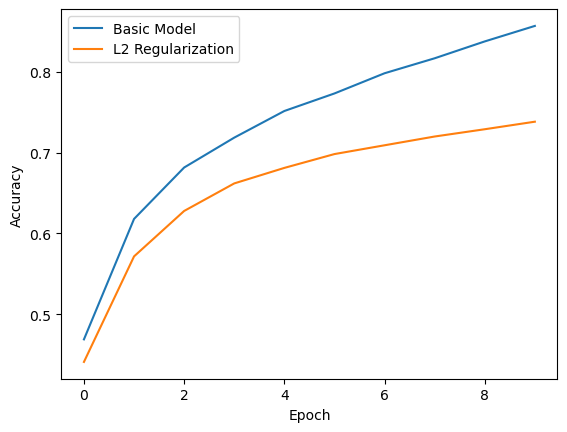

In [5]:

model_with_l2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')
])

model_with_l2.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

history_with_l2 = model_with_l2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


plt.plot(history.history['accuracy'], label='Basic Model')
plt.plot(history_with_l2.history['accuracy'], label='L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




#### Comparison of using data preprocessing vs no preprocessing.
From the graph we can see that, the accuracy difference between preprocesse data and without preproces data not much. The accuracy level almost same here.

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.7083 - accuracy: 0.3682 - val_loss: 1.2347 - val_accuracy: 0.5502
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.1325 - accuracy: 0.5961 - val_loss: 0.9896 - val_accuracy: 0.6510
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9535 - accuracy: 0.6610 - val_loss: 0.9212 - val_accuracy: 0.6797
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8181 - accuracy: 0.7123 - val_loss: 0.8602 - val_accuracy: 0.6997
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7334 - accuracy: 0.7433 - val_loss: 0.8663 - val_accuracy: 0.7035
Epoch 6/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.6392 - accuracy: 0.7773 - val_loss: 0.8836 - val_accuracy: 0.6962
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5749 - accuracy: 0.8007 - val_loss: 0.8488 -

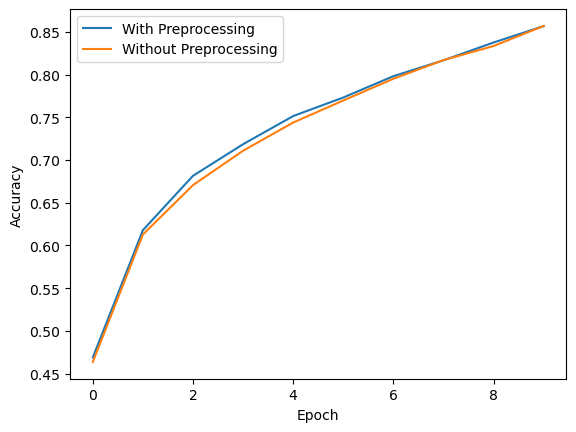

In [6]:
model_no_preprocessing = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_no_preprocessing.compile(optimizer='adam',
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

history_no_preprocessing = model_no_preprocessing.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='With Preprocessing')
plt.plot(history_no_preprocessing.history['accuracy'], label='Without Preprocessing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
